<a href="https://colab.research.google.com/github/manojkumar22092003/NAVIES-BAYES/blob/main/NAVIES_BIAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import graphviz
from sklearn.metrics import balanced_accuracy_score

In [ ]:
df = pd.read_csv('card_transdata (1).csv')

In [ ]:
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [ ]:
A = df.head(10000)

In [ ]:
A.tail()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
9995,4.225100,2.678220,0.556858,1.0,0.0,0.0,1.0,0.0
9996,3.614858,0.431593,0.061778,1.0,0.0,0.0,1.0,0.0
9997,10.131863,10.262508,2.818090,1.0,0.0,0.0,1.0,0.0
9998,16.306236,0.014054,1.904495,1.0,0.0,0.0,1.0,0.0
9999,1.292596,0.415847,1.332285,0.0,1.0,0.0,1.0,0.0


In [ ]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   distance_from_home              10000 non-null  float64
 1   distance_from_last_transaction  10000 non-null  float64
 2   ratio_to_median_purchase_price  10000 non-null  float64
 3   repeat_retailer                 10000 non-null  float64
 4   used_chip                       10000 non-null  float64
 5   used_pin_number                 10000 non-null  float64
 6   online_order                    10000 non-null  float64
 7   fraud                           10000 non-null  float64
dtypes: float64(8)
memory usage: 625.1 KB


In [ ]:
A.shape

(10000, 8)

In [ ]:
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
A.nunique()

distance_from_home                10000
distance_from_last_transaction    10000
ratio_to_median_purchase_price    10000
repeat_retailer                       2
used_chip                             2
used_pin_number                       2
online_order                          2
fraud                                 2
dtype: int64

In [ ]:

A.isnull()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False


In [ ]:
A.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [ ]:
A.notnull().sum()

distance_from_home                10000
distance_from_last_transaction    10000
ratio_to_median_purchase_price    10000
repeat_retailer                   10000
used_chip                         10000
used_pin_number                   10000
online_order                      10000
fraud                             10000
dtype: int64

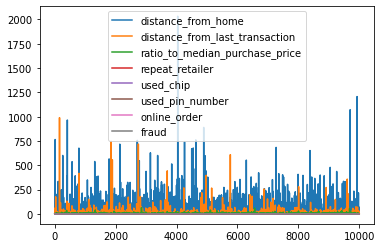

In [ ]:
A.plot()

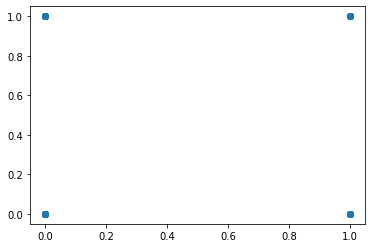

In [ ]:
x =A.used_chip
y = A.fraud
plt.scatter(x,y)

([<matplotlib.patches.Wedge at 0x7f4425433400>,
  ...],
 [Text(1.1, 0.0, ''),
  Text(1.1, 0.0, ''),
  Text(1.1, 0.0, ''),
  Text(1.1, 0.0, ''),
  Text(1.1, 0.0, ''),
  Text(1.1, 0.0, ''),
  Text(1.1, 0.0, ''),
  Text(1.1, 0.0, ''),
  Text(1.1, 0.0, ''),
  Text(1.1, 0.0, ''),
  Text(1.1, 0.0, ''),
  Text(1.1, 0.0, ''),
  Text(1.1, 0.0, ''),
  Text(1.0999923251494699, 0.004109088982148003, ''),
  Text(1.099969300704976, 0.008218120624943726, ''),
  Text(1.099969300704976, 0.008218120624943726, ''),
  Text(1.099969300704976, 0.008218120624943726, ''),
  Text(1.099969300704976, 0.008218120624943726, ''),
  Text(1.099969300704976, 0.008218120624943726, ''),
  Text(1.099969300704976, 0.008218120624943726, ''),
  Text(1.099969300704976, 0.008218120624943726, ''),
  Text(1.099969300704976, 0.008218120624943726, ''),
  Text(1.099969300704976, 0.008218120624943726, ''),
  Text(1.099969300704976, 0.008218120624943726, ''),
  Text(1.0999309269878081, 0.012327037589835022, ''),
  Text(1.09987720453

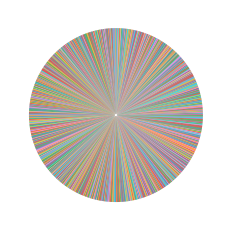

In [ ]:
x = A.fraud
plt.pie(x)

<ipython-input-63-d6e1145c2a46>:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(x,y)


<StemContainer object of 3 artists>

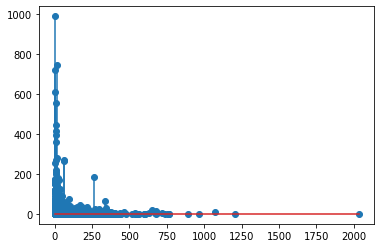

In [ ]:
x =A.	distance_from_home
y = A.distance_from_last_transaction
plt.stem(x,y)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f441284fa90>,
 'caps': [<matplotlib.lines.Line2D at 0x7f44122fc190>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f441284f730>],
 'medians': [<matplotlib.lines.Line2D at 0x7f44122fc850>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f44122fcb50>],
 'means': []}

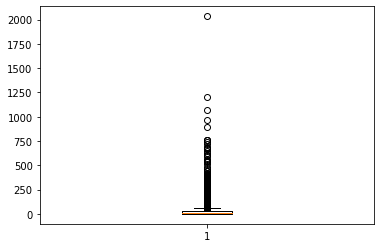

In [ ]:
y = A.distance_from_home
plt.boxplot(y)

In [ ]:
 x = A.drop('fraud', axis = 1)
 y = A['fraud']

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

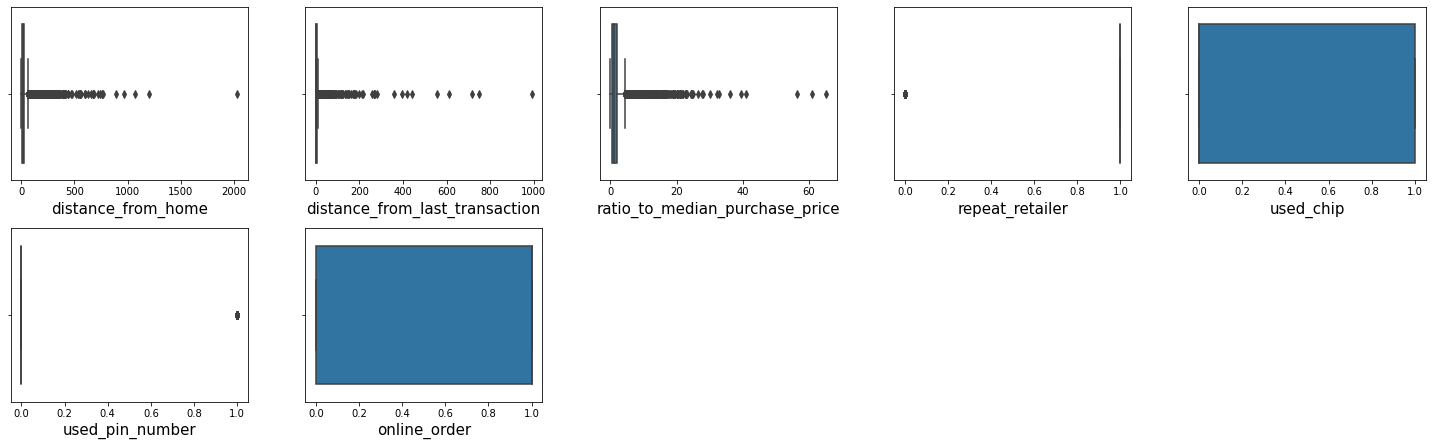

In [ ]:
plt.figure(figsize = (20, 15))
plotnumber = 1
for col in x.columns:
  if plotnumber <= 24:
    ax =  plt.subplot(5,5,plotnumber)
    sns.boxplot(x[col])
    plt.xlabel(col, fontsize = 15)
  plotnumber += 1
plt.tight_layout()
plt.show()

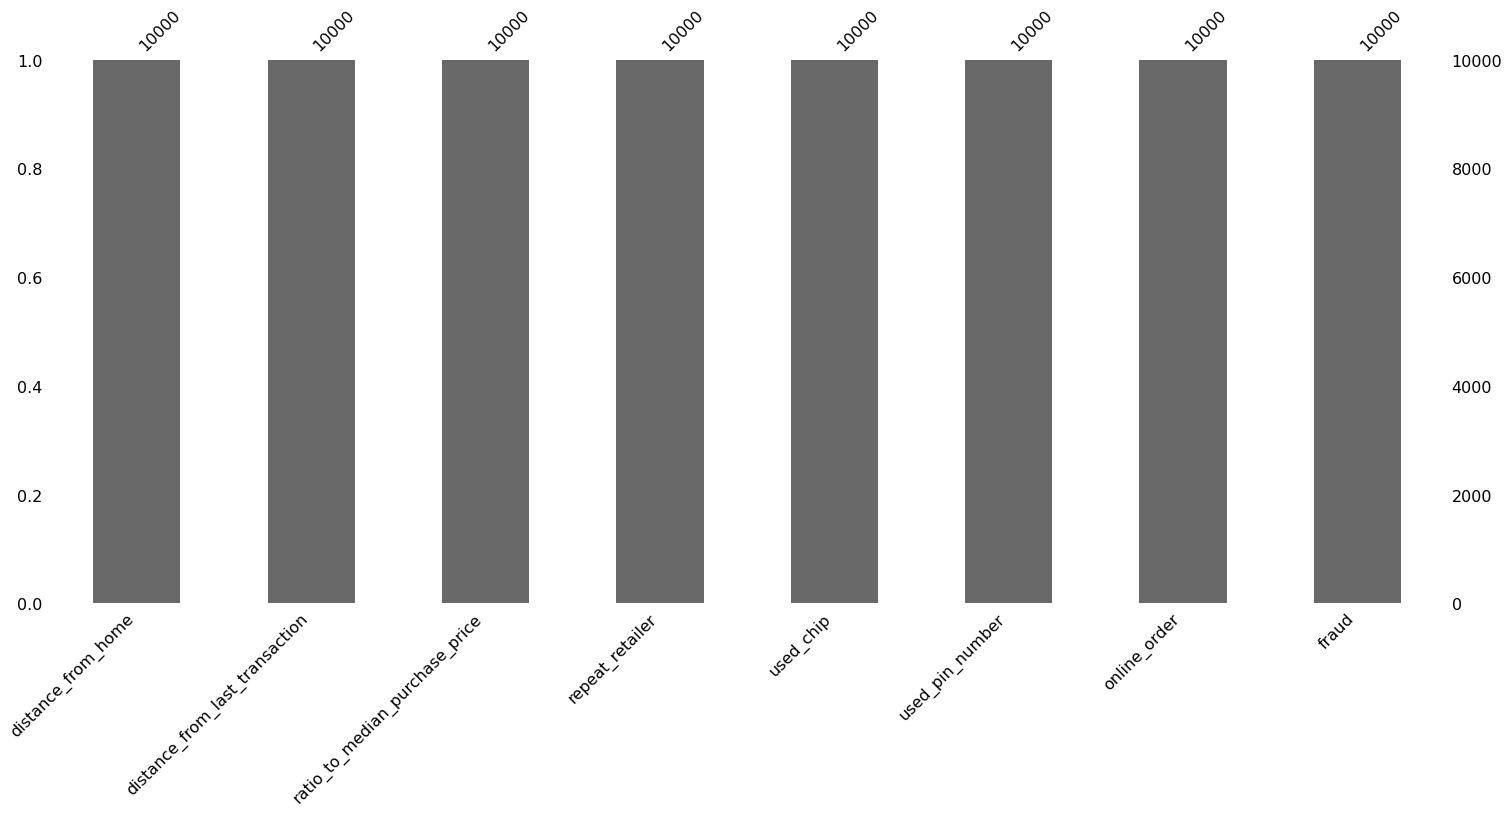

In [ ]:
import missingno as msno
msno.bar(A)
plt.show()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state=0)

In [ ]:
a = StandardScaler()
x_train = a.fit_transform(x_train)
x_test = a.transform(x_test)

In [ ]:
clf = DecisionTreeClassifier(criterion = "entropy",random_state=0)
clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
y_pred = clf.predict(x_test)

In [ ]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[1841,    1],
       [   0,  158]])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test, y_pred)

0.9995

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
classifier = GaussianNB()
classifier.fit(x_train,y_train)

GaussianNB()

In [ ]:
y_pred = classifier.predict(x_test)

In [ ]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[1818,   24],
       [  70,   88]])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test, y_pred)

0.953